In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X.shape

(506, 13)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

In [5]:
print(X_train.shape, Y_train.shape)

(354, 13) (354,)


# Implementation of LinearRegression with SGD

**Model Parameters**

* Iterations : 400
* Learning Rate (alpha): 0.01
* Weights (initialized to zero)

In [16]:
class LinearRegressionSGD:
    
    def __init__(self,alpha,itr,theta):
        self.alpha = alpha
        self.itr = itr
        self.theta = theta
        
    def predict(self,x,theta):
        '''
            predict the y values for given x and theta
        '''
        return theta.dot(x)
    
    def cost_function(self,X,THETA,Y):
        '''
            compute the cost = total loss(Mean Square Error) over the entire dataset
        '''
        m = len(Y)
        J = np.sum(np.power((THETA.dot(X) -Y),2)) /(m)
        return J

    def fit(self,X,Y):
        '''
            learns the weight matrix by minimizing mean square error for Linear Regression
            and return the weights
            
            input: x, y
            output: wt vector
        '''

        costs = [0]* self.itr
        m = len(Y)
        list_of_thetas = []
        for iteration in range(self.itr):
            h = self.theta.dot(X)
            loss = h-Y
            gradient = X.dot(loss)/m

            self.theta = self.theta - (self.alpha * gradient)
            list_of_thetas.append(self.theta)
            cost = self.cost_function(X,self.theta,Y)

            costs[iteration] = cost
        return self.theta, costs, list_of_thetas

In [17]:
temp = X_train.T
print("Shape before adding bias term: ", temp.shape)
x = np.vstack((np.ones((temp.shape[1]), dtype=temp.dtype),temp))
print("Shape after adding bias term: ", x.shape)

Shape before adding bias term:  (13, 354)
Shape after adding bias term:  (14, 354)


In [18]:
theta = np.zeros((X_train.shape[1]+1))

In [19]:
model = LinearRegressionSGD(alpha = 0.01, itr=400,theta=theta)

In [20]:
w,c,t = model.fit(x,Y_train)

## Plotting cost vs iterations

Text(0.5, 1.0, 'MSE vs iterations')

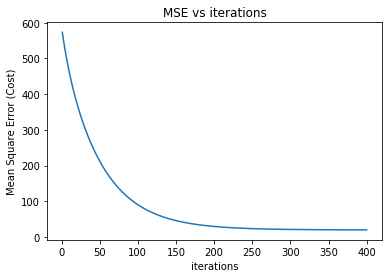

In [21]:
plt.plot(np.arange(1,401),c)
plt.xlabel("iterations")
plt.ylabel("Mean Square Error (Cost)")
plt.title("MSE vs iterations")

**Predicting values from the weights returned by model**

In [22]:
tem = X_test.T
x_test = np.vstack((np.ones((tem.shape[1]), dtype=tem.dtype),tem))
#Predicted Values
y_predict = model.predict(x_test,w)

**Plotting Actual vs Predicted Values(from custom model)**

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

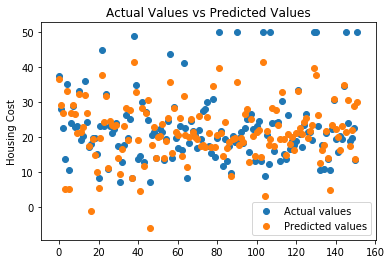

In [23]:
plt.scatter(np.arange(len(Y_test)),Y_test,label="Actual values")
plt.scatter(np.arange(len(y_predict)),y_predict, label="Predicted values")
plt.legend()
plt.xlabel("")
plt.ylabel("Housing Cost")
plt.title("Actual Values vs Predicted Values")

# Using Scikit-Learn for LinearRegression

In [24]:
skl_model = SGDRegressor()
skl_model.fit(X_train,Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

**Predicting values of test data**

In [25]:
y_pred_skl = skl_model.predict(X_test)

**Plotting Actual vs Predicted Values (from scikit-learn)**

Text(0.5, 1.0, 'Actual Values vs Predicted Values (scikit-learn)')

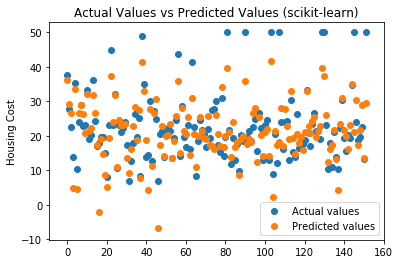

In [26]:
plt.scatter(np.arange(len(Y_test)),Y_test,label="Actual values")
plt.scatter(np.arange(len(y_pred_skl)),y_pred_skl, label="Predicted values")
plt.legend()
plt.xlabel("")
plt.ylabel("Housing Cost")
plt.title("Actual Values vs Predicted Values (scikit-learn)")

**Comparing weights achieved from sckit-learn and custom-model**

In [27]:
w.shape

(14,)

In [28]:
x = PrettyTable()
x.field_names = ["Wts from scikit-learn", "Wts from custom model"]

x.add_row([skl_model.intercept_, w[0]])
for i in range(1,len(w)-1):
    x.add_row([skl_model.coef_[i], w[i]])

print(x)

+-----------------------+-----------------------+
| Wts from scikit-learn | Wts from custom model |
+-----------------------+-----------------------+
|      [21.7755662]     |   21.977428393597865  |
|   0.4166928447754231  |  -1.0646929030953642  |
|  -0.6959211379660356  |  0.41106616151126935  |
|   0.2674852792538484  |  -0.6441506391268554  |
|  -0.3515743947705695  |  0.22351015724808548  |
|   3.375235017644024   |  -0.5556047715955854  |
|  -0.7254253863328829  |   3.243882518442466   |
|   -1.764713760975462  |  -0.5497696875323178  |
|   0.8037961029344158  |   -1.89213175124705   |
|  -0.5549161953895801  |   0.9383459595804698  |
|  -1.8845551222532906  |  -0.5706613334834203  |
|   1.1475024068543918  |   -1.982217181455551  |
|  -2.8337445079953714  |   1.0740411741066003  |
+-----------------------+-----------------------+


In [29]:
mse_custom = model.cost_function(x_test,w,Y_test)
mse_skl = mean_squared_error(Y_test,skl_model.predict(X_test))
print("Mean Square Error on test data (Custom Model): ", mse_custom)
print("Mean Square Error on test data (scikit-learn): ", mse_skl)

Mean Square Error on test data (Custom Model):  33.33900276318067
Mean Square Error on test data (scikit-learn):  34.69941862492631
